In [1]:
import os
import io
from zipfile import ZipFile
import pandas as pd
import tensorflow as tf
from PIL import Image
import numpy as np
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import *
import os
import zipfile
from google.colab import drive
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/eyes_train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
#백내장 무 폴더 정리
img_dir0 = '/content/eyes_train/eye_train/0'
img0 = os.listdir(img_dir0)
image0 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img0))
label0 = list(filter(lambda x : x.find('.json')!=-1,img0))
image_0 = []
image_label0 = []
for i in image0:
    img = np.array(Image.open('/content/eyes_train/eye_train/0/{}'.format(i)))
    im0 = cv2.resize(img,(224,224))
    image_0.append(im0)
    image_label0.append(0)

In [5]:
#백내장 초기 폴더 정리
img_dir1 = '/content/eyes_train/eye_train/1'
img1 = os.listdir(img_dir1)
image1 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img1))
label1 = list(filter(lambda x : x.find('.json')!=-1,img1))
for i in image1:
    img = np.array(Image.open('/content/eyes_train/eye_train/1/{}'.format(i)))
    im1 = cv2.resize(img,(224,224))
    image_0.append(im1)
    image_label0.append(1)

In [6]:
#백내장 비성숙 폴더 정리
img_dir2 = '/content/eyes_train/eye_train/2'
img2 = os.listdir(img_dir2)
image2 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img2))
label2 = list(filter(lambda x : x.find('.json')!=-1,img2))
for i in image2:
    img = np.array(Image.open('/content/eyes_train/eye_train/2/{}'.format(i)))
    im2 = cv2.resize(img,(224,224))
    image_0.append(im2)
    image_label0.append(2)

In [7]:
#백내장 성숙 폴더 정리
img_dir3 = '/content/eyes_train/eye_train/3'
img3 = os.listdir(img_dir3)
image3 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img3))
label3 = list(filter(lambda x : x.find('.json')!=-1,img3))
for i in image3:
    img = np.array(Image.open('/content/eyes_train/eye_train/3/{}'.format(i)))
    im3 = cv2.resize(img,(224,224))
    image_0.append(im3)
    image_label0.append(3)

In [8]:
x = np.array(image_0)
y = np.array(image_label0)

In [9]:
#원핫 인코딩
y = np_utils.to_categorical(y)

In [10]:
#데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, shuffle =True, test_size = 0.2, random_state = 123)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.nn import silu
#EfficientNetB5불러오기
Eff = EfficientNetB4(weights = None, input_shape = (224,224,3), include_top = False, pooling='avg')

In [16]:
Eff.summary()

Model: "efficientnetb4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

In [10]:
rmsprop = RMSprop(
    learning_rate=0.001,
)

In [11]:
model = Sequential()
#분류기 직접 정리
model.add(Eff)
model.add(Dense(1024))
model.add(Activation('silu'))
model.add(Dense(4,activation = 'softmax'))
model.compile(optimizer=rmsprop, # 옵티마이저 : rmsprop
              loss = 'categorical_crossentropy', # 손실 함수 : sparse_categorical_crossentropy
              metrics = ['accuracy']) # 모니터링 할 평가지표 : 
history = model.fit(x_train, y_train, 
                      epochs = 10, 
                      batch_size = 32, 
                      validation_data = (x_val, y_val))

Epoch 1/10
688/688 [==============================] - 551s 755ms/step - loss: 1.0204 - accuracy: 0.4705 - val_loss: 0.8403 - val_accuracy: 0.5431
Epoch 2/10
688/688 [==============================] - 516s 750ms/step - loss: 0.8335 - accuracy: 0.5713 - val_loss: 0.8177 - val_accuracy: 0.6128
Epoch 3/10
688/688 [==============================] - 516s 749ms/step - loss: 0.7309 - accuracy: 0.6520 - val_loss: 0.6684 - val_accuracy: 0.6931
Epoch 4/10
688/688 [==============================] - 515s 749ms/step - loss: 0.6770 - accuracy: 0.6886 - val_loss: 0.6445 - val_accuracy: 0.7080
Epoch 5/10
688/688 [==============================] - 516s 750ms/step - loss: 0.6407 - accuracy: 0.7105 - val_loss: 0.7294 - val_accuracy: 0.6846
Epoch 6/10
688/688 [==============================] - 516s 750ms/step - loss: 0.6058 - accuracy: 0.7306 - val_loss: 0.6425 - val_accuracy: 0.6986
Epoch 7/10
688/688 [==============================] - 515s 749ms/step - loss: 0.5724 - accuracy: 0.7532 - val_loss: 0.6454 -

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 dense (Dense)               (None, 1024)              1836032   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 19,513,955
Trainable params: 19,388,748
Non-trainable params: 125,207
_________________________________________________________________


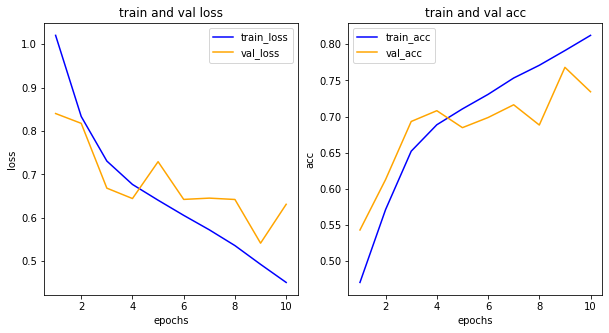

In [13]:
# 정확도와 로스 그래프
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [14]:
# 6. 모델 저장하기
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/EfficientNetB4_6000_tune0_None.h5')

In [11]:
#정확도 f1
from sklearn.metrics import *
def get_clf_eval(y_test,pred): 
  f1 = f1_score(y_test,pred,average="macro") 
  acc = accuracy_score(y_val,predict)   
  loss = model.evaluate(x_val, y_val, batch_size=32)
  print('정확도 :',acc)
  print('f1 score:',f1)
  print('loss :',loss )

In [12]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/EfficientNetB4_6000_tune0_None.h5')

In [13]:
predcit = model.predict(x_val)
predict = []
for i in np.arange(len(predcit)):
  labels = np.argmax(predcit[i])
  predict.append(labels)
predict = np.array(predict)
predict = np_utils.to_categorical(predict)

172/172 [==============================] - 16s 33ms/step


In [14]:
get_clf_eval(y_val,predict)

172/172 [==============================] - 9s 35ms/step - loss: 0.6312 - accuracy: 0.7342
정확도 : 0.7341933139534884
f1 score: 0.7027262340710677
loss : [0.6312180161476135, 0.7341933250427246]
